In [1]:
import string
import warnings
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
original_data = pd.read_excel(r"/opt/jupyter_data/data_clean/cleaning/6_unique_data.xlsx")
final_data = pd.read_excel(r"/opt/jupyter_data/data_clean/cleaning/6_after_removing_outliers.xlsx")

In [3]:
def draw(df, figname, columns, lim1, lim2, lim3, lim4, number):
    """This function draws scatter plots, cumulative distribution function plots, and boxplots of the data.
    """
    plt.figure(figsize=(8.5, 11))
    # parameter assignment
    font = {'family': 'Times New Roman', 'size': 10}
    labelsize = 10
    x_coordinate = -0.15
    y_coordinate = 1.05
    wspace = 0.45
    hspace = 0.3

    lim_list = [lim1, lim2, lim3]
    color_list = ['red', 'blue', 'green']
    xlabel_list = ['MW', 'logP', 'logVD$_{ss}$']

    # draw scatters
    for m, column, xlabel, color, lim in zip(range(1, 4), columns, xlabel_list, color_list, lim_list):
        scatter_ax = plt.subplot(3, 3, m)
        scatter_ax.scatter(df[column], df[column], c=color)
        # set the labels and font size of the x and y axes
        scatter_ax.set_xlabel(xlabel, font)
        scatter_ax.set_ylabel('Value', font)
        # set tick label font size
        plt.tick_params(labelsize=labelsize)
        # set the font of the x-axis and y-axis tick values
        labels = scatter_ax.get_xticklabels() + scatter_ax.get_yticklabels()
        [label.set_fontname('Times New Roman') for label in labels]
        # add numbers to figures
        if m == 1:
            scatter_ax.text(x_coordinate, y_coordinate, number,
                            transform=scatter_ax.transAxes, size=10, 
                            family='Times New Roman', weight='bold')
        # set the range of y
        plt.ylim(lim)

    # draw cumulative distribution function figures
    for m, column, xlabel in zip(range(4, 7), columns, xlabel_list):
        ax = plt.subplot(3, 3, m)
        # extract data
        sample = df[column]
        ecdf = sm.distributions.ECDF(sample)
        # define x-axis data
        x = np.linspace(min(sample), max(sample))
        # the cumulative density probablity corresponding to the value on the x-axis
        y = ecdf(x)
        # set the labels and font size of the x and y axes
        ax.set_xlabel(xlabel, font)
        ax.set_ylabel('Probability', font)
        # set tick label font size
        plt.tick_params(labelsize=labelsize)
        # set the font of the x-axis and y-axis tick values
        labels = ax.get_xticklabels() + ax.get_yticklabels()
        [label.set_fontname('Times New Roman') for label in labels]
        # draw a ladder diagram
        plt.step(x, y)
        # set the range of y
        plt.ylim(lim4)

    # draw boxplots
    for m, column, xlabel, lim in zip(range(7, 10), columns, xlabel_list, lim_list):
        box_ax = plt.subplot(3, 3, m)
        box_ax.boxplot(df[column])
        # set the x-axis tick labels
        box_ax.set_xticklabels([xlabel])
        # set the label and font size of the y-axis
        box_ax.set_ylabel('Value', font)
        # set tick label font size
        plt.tick_params(labelsize=labelsize)
        # set the font of the x-axis and y-axis tick values
        labels = box_ax.get_xticklabels() + box_ax.get_yticklabels()
        [label.set_fontname('Times New Roman') for label in labels]
        # set the range of y
        plt.ylim(lim)

    # set the spacing between graphs
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    plt.savefig(figname, bbox_inches='tight', dpi=300)
    plt.show()

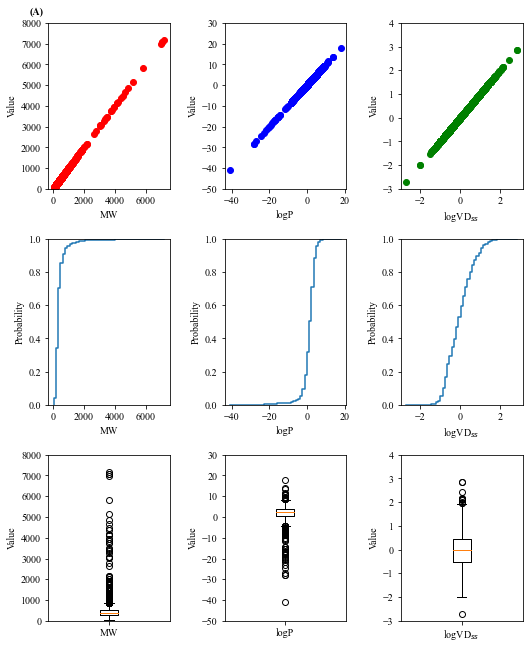

In [4]:
# draw the graphs of the original data
draw(original_data, figname="figure2_1.tiff", columns=['MW', 'LOGP', 'logVDss'],
     lim1=(0, 8000), lim2=(-50, 30), lim3=(-3, 4), lim4=(0, 1), number='(A)')

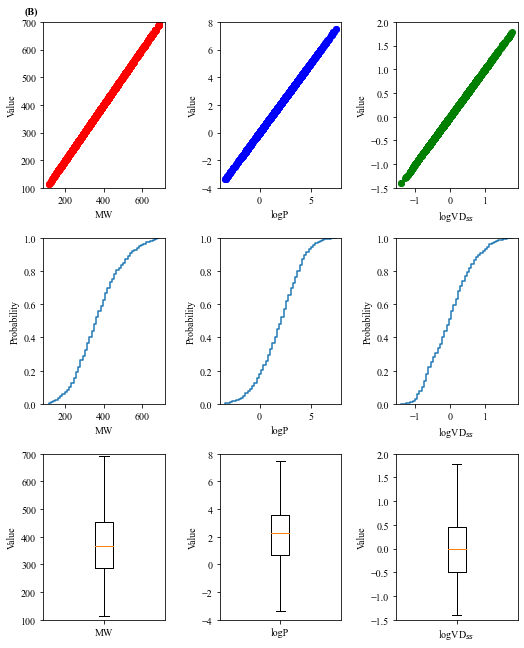

In [5]:
# draw the graphs after deleting the outliers
draw(final_data, figname="figure2_2.tiff", columns=['MW', 'LOGP', 'logVDss'],
     lim1=(100, 700), lim2=(-4, 8), lim3=(-1.5, 2), lim4=(0, 1), number='(B)')